# Find Kth Largest Value in BST

Write a function that takes in a **Binary Search Tree (BST)** and a positive integer **k** and return the kth largest integer contained in the **BST**.

You can assume that there will only be integer values in the BST and that **k** is less than or equal to the number of nodes in the tree.

Also, for the purpose of this question, duplicate integers will be treated as distinct values. In other words, the second largest value in a BST containing values `{5,7,7}`will be `7`- not `5`.

Each **BST** node has an integer **value**, a **left** child node, and a **right** child node. A node is said to be a valid **BST** node if and only if it satisfies the **BST** property:

- its **value** is strictly greater than the values of every onde to its left;
- its **value** is less than or equal to the values of every node to is rights;
- its children nodes are either valid **BST** nodes themselves or **None**/**null**.

Sample Input

```python
 tree =   10
       /     \
      5       20
    /   \   /   \
   2    5  17    22
  / \          
 1   3        

k = 3
```

Sample output

```python
17
```

**Hint 1**

Make sure to consider the fact that the given tree is a Binary Search Tree - not just a regular Binary Tree. How does this fact help you the problem in a more optimal time complexity?

**Hint 2**

The brute-force approach to this problem is to simply perform an in-order traversal of this **BST** and to store all of its node's values in the order in which they're visited. Since an in-order traversal of a **BST** visits the nodes in ascending order, the ``k``th value from the end of the traversal order will be the `k`th largest value.

**Hint 3**

You can actually solve this problem in `O(h + k)` time, where `h` is the height of the tree. Rather than looking at the nodes in ascending order, you shold look at them in descending order.

**Hint 4**

To solve this problem in `O(h + k)`time as mentioned in Hint 3, you need to perform a **reverse** in-order traversal. Since you'll be looking at nodes in descending order, you can simply return the `k`th visited in the reverse in-order traversal.

**Optimal Space & Time Complexity**

- O(h+k) time | O(h) space - where `h`is the height of the tree and `k`is the input parameter.

# Classes definitions

In [2]:
!pip install pytest pytest-sugar

In [3]:
%%file binarysearchtree.py
import plotly.graph_objs as go

class Node:
    """
    A class representing a node in a binary search tree.

    Attributes:
    - value: the value of the node
    - left_child: the left child of the node
    - right_child: the right child of the node
    """

    def __init__(self, value):
        """
        Initializes a new instance of the Node class.

        Args:
        - value: the value of the node
        """
        self.value = value
        self.left_child = None
        self.right_child = None


class BST:
    """
    A class representing a binary search tree.

    Attributes:
    - root: the root node of the tree
    """

    def __init__(self):
        """
        Initializes a new instance of the BST class.
        """
        self.root = None

    def add(self, value):
        """
        Adds a new node with the given value to the tree.

        Args:
        - value: the value of the node to add
        """
        if self.root is None:
            # The root does exist yet, create it
            self.root = Node(value)
        else:
            # Find the right place and insert new value
            self._add_recursive(self.root, value)

    def _add_recursive(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the correct position to add the new node.

        Args:
        - current_node: the current node to traverse
        - value: the value of the node to add
        """
        if value <= current_node.value:
            # Go to the left
            if current_node.left_child is None:
                current_node.left_child = Node(value)
            else:
                self._add_recursive(current_node.left_child, value)
        else:
            # Go to the right
            if current_node.right_child is None:
                current_node.right_child = Node(value)
            else:
                self._add_recursive(current_node.right_child, value)

    def _contains(self, current_node, value):
        """
        A helper method to recursively traverse the tree and find the node with the given value.

        Args:
        - current_node: the current node to traverse
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        if current_node is None:
            return False
        if current_node.value == value:
            return True
        if value < current_node.value:
            return self._contains(current_node.left_child, value)
        return self._contains(current_node.right_child, value)

    def contains(self, value):
        """
        Checks whether a node with the given value is present in the tree.

        Args:
        - value: the value to search for

        Returns:
        - True if a node with the given value is found, False otherwise
        """
        return self._contains(self.root, value)

    def plot(self):
        """
        Plots the binary search tree using Plotly.
        """
        if self.root is None:
            print("The tree is empty!")
            return

        # Initialize lists for coordinates and connections
        node_coords = []
        lines = []

        # Helper function to traverse the tree and fill the coordinate and connection lists
        def _plot_recursive(node, x, y, offset):
            if node is not None:
                node_coords.append((x, y, node.value))
                if node.left_child is not None:
                    new_x = x - offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.left_child, new_x, new_y, offset / 2)
                if node.right_child is not None:
                    new_x = x + offset
                    new_y = y - 1
                    lines.append((x, y, new_x, new_y))
                    _plot_recursive(node.right_child, new_x, new_y, offset / 2)

        # Traverse the tree starting from the root node
        _plot_recursive(self.root, x=0, y=0, offset=0.5)

        # Create a scatter plot for the nodes
        node_trace = go.Scatter(x=[x for x, y, _ in node_coords],
                                y=[y for _, y, _ in node_coords],
                                text=[str(val) for _, _, val in node_coords],
                                mode='markers+text',
                                textposition='top center',
                                marker=dict(symbol='circle',
                                            size=20,
                                            color='darkblue'))

        # Create a scatter plot for the connections between nodes
        line_trace = go.Scatter(x=sum([[x1, x2, None] for x1, y1, x2, y2 in lines], []),
                                y=sum([[y1, y2, None] for x1, y1, x2, y2 in lines], []),
                                mode='lines',
                                line=dict(color='black'))

        # Combine the two scatter plots
        layout = go.Layout(title='',
                           xaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           yaxis=dict(title='', showgrid=False, zeroline=False, showticklabels=False),
                           showlegend=False)

        fig = go.Figure(data=[node_trace, line_trace], layout=layout)
        fig.show()

Writing binarysearchtree.py


In [4]:
%run -i binarysearchtree.py

In [5]:
from binarysearchtree import *
# Example usage:
bst = BST()
for value in [5, 3, 1, 0, 2, 4, 7, 6, 8]:
    bst.add(value)
bst.plot()

In [6]:
%%file closestvalue.py
import pytest
from binarysearchtree import *

def findKthLargestValue(tree, k):
    """
    Finds the kth largest integer in a Binary Search Tree (BST).

    The function traverses the BST in an in-order manner to collect the node values in a sorted list.
    It then returns the kth largest value from this list. The BST is assumed to contain only integer values.
    In case of duplicate integers, they are treated as distinct values.
    The kth largest integer is determined in the context of these distinct values.

    Parameters:
    tree (BST): the Binary Search Tree (BST).
    k (int): A positive integer representing the kth position.

    Returns:
    int: The kth largest integer present in the BST.
    """

    sortedNodeValues = []
    inOrderTraverse(tree.root,sortedNodeValues)
    return sortedNodeValues[len(sortedNodeValues) - k]

def inOrderTraverse(node, sortedNodeValues):
    if node is None:
        return

    inOrderTraverse(node.left_child, sortedNodeValues)
    sortedNodeValues.append(node.value)
    inOrderTraverse(node.right_child, sortedNodeValues)


@pytest.fixture(scope="session")
def data():

    array = [[15,5,20,17,22,2,5,1,3],
             [5,4,6,3,7],
             [5],
             [20,15,25,10,19,21,30,22],
             [1,2,3,4,5],
             [10,8,6,4,2],
             [10,8,6,9,4,7,2,5,3],
             [99727,99,727],
             [15,5,20,17,22,24,23,25,2,5,1,3],
             [15,5,20,17,22,2,5,1,3],
             [15,5,20,17,22,2,5,1,3]
             ]
    return array

def test_1(data):
    bst = BST()
    for value in data[0]:
      bst.add(value)
    assert findKthLargestValue(bst, 3) == 17

def test_2(data):
    bst = BST()
    for value in data[1]:
      bst.add(value)
    assert findKthLargestValue(bst, 1) == 7

def test_3(data):
    bst = BST()
    for value in data[2]:
      bst.add(value)
    assert findKthLargestValue(bst, 1) == 5

def test_4(data):
    bst = BST()
    for value in data[3]:
      bst.add(value)
    assert findKthLargestValue(bst, 3) == 22

def test_5(data):
    bst = BST()
    for value in data[4]:
      bst.add(value)
    assert findKthLargestValue(bst, 5) == 1

def test_6(data):
    bst = BST()
    for value in data[5]:
      bst.add(value)
    assert findKthLargestValue(bst, 2) == 8

def test_7(data):
    bst = BST()
    for value in data[6]:
      bst.add(value)
    assert findKthLargestValue(bst, 5) == 6

def test_8(data):
    bst = BST()
    for value in data[7]:
      bst.add(value)
    assert findKthLargestValue(bst, 1) == 99727

def test_9(data):
    bst = BST()
    for value in data[8]:
      bst.add(value)
    assert findKthLargestValue(bst, 7) == 15

def test_10(data):
    bst = BST()
    for value in data[9]:
      bst.add(value)
    assert findKthLargestValue(bst, 5) == 5

def test_11(data):
    bst = BST()
    for value in data[10]:
      bst.add(value)
    assert findKthLargestValue(bst, 6) == 5

Writing closestvalue.py


In [7]:
!pytest closestvalue.py -vv

Test session starts (platform: linux, Python 3.10.12, pytest 8.3.4, pytest-sugar 1.0.0)
cachedir: .pytest_cache
rootdir: /content
plugins: sugar-1.0.0, typeguard-4.4.1, anyio-3.7.1
collected 11 items                                                                                 

 closestvalue.py::test_1 ✓                                                             9% ▉         
 closestvalue.py::test_2 ✓                                                            18% █▊        
 closestvalue.py::test_3 ✓                                                            27% ██▊       
 closestvalue.py::test_4 ✓                                                            36% ███▋      
 closestvalue.py::test_5 ✓                                                            45% ████▋     
 closestvalue.py::test_6 ✓                                                            55% █████▌    
 closestvalue.py::test_7 ✓                                                            64% ██████▍   
 closestval

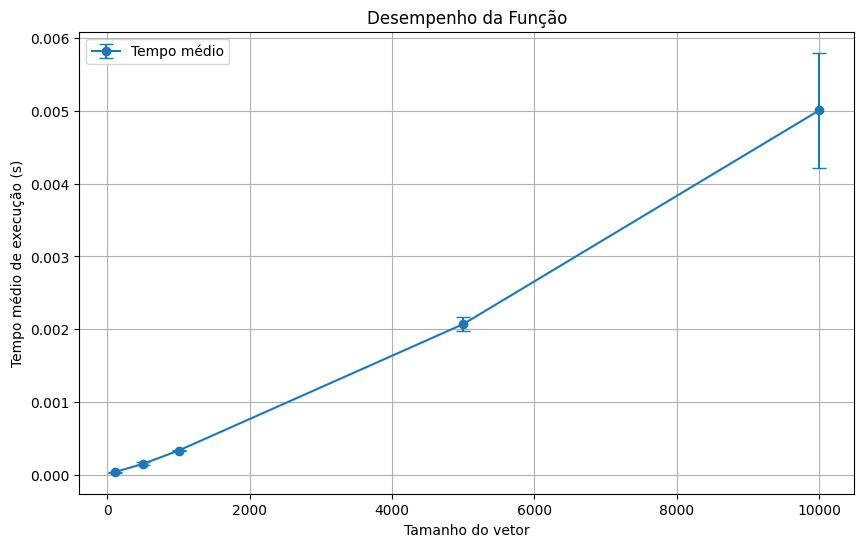

In [28]:
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem, t

def measure_execution_time(func, input_data, num_executions=10):
    """
    Mede o tempo de execução de uma função para um dado input múltiplas vezes.

    Parâmetros:
        func (callable): Função a ser medida.
        input_data: Input a ser passado para a função.
        num_executions (int): Número de execuções para cálculo do tempo médio.

    Retorna:
        tuple: (tempo médio, intervalo de confiança, tempos individuais).
    """
    times = []
    for _ in range(num_executions):
        start_time = time.time()
        func(input_data)
        elapsed_time = time.time() - start_time
        times.append(elapsed_time)

    mean_time = np.mean(times)
    confidence_interval = t.interval(
        0.95, len(times)-1, loc=mean_time, scale=sem(times)
    )
    return mean_time, confidence_interval, times

# Exemplo de uso com vetores de tamanhos variados
def run_tests(func, sizes, num_executions=10, seed=100000):
    """
    Realiza testes para uma função com vetores de tamanhos variados.

    Parâmetros:
        func (callable): Função a ser testada.
        sizes (list): Lista de tamanhos de vetor.
        num_executions (int): Número de execuções por tamanho.
        seed (int): Semente para geração de números aleatórios.

    Retorna:
        tuple: (tamanhos, tempos médios, intervalos de confiança).
    """
    np.random.seed(seed)  # Define a seed para reprodutibilidade
    means = []
    confidence_intervals = []

    for size in sizes:
        # Gere um vetor de exemplo de tamanho `size`
        input_data = np.random.randint(0, 10000, size)
        mean_time, conf_interval, _ = measure_execution_time(func, input_data, num_executions)
        means.append(mean_time)
        confidence_intervals.append((conf_interval[1] - conf_interval[0]) / 2)  # Meio do intervalo

    return sizes, means, confidence_intervals

def plot_results(sizes, means, confidence_intervals):
    """
    Gera gráficos de tamanho do vetor vs tempo de execução com intervalos de confiança.

    Parâmetros:
        sizes (list): Tamanhos dos vetores (eixo x).
        means (list): Tempos médios de execução (eixo y).
        confidence_intervals (list): Intervalos de confiança para barras de erro.
    """
    plt.figure(figsize=(10, 6))
    plt.errorbar(sizes, means, yerr=confidence_intervals, fmt='o-', capsize=5, label='Tempo médio')
    plt.xlabel('Tamanho do vetor')
    plt.ylabel('Tempo médio de execução (s)')
    plt.title('Desempenho da Função')
    plt.legend()
    plt.grid(True)
    plt.show()

# Exemplo de integração
# Substitua `sua_funcao` pela função que deseja testar
def sua_funcao(vetor):
    # Substitua pelo código da função a ser testada
    sorted(vetor)

# Tamanhos de vetor para teste
tamanhos = [100, 500, 1000, 5000, 10000]

# Executa os testes
tamanhos, tempos_medios, intervalos = run_tests(sua_funcao, tamanhos, num_executions=10, seed=42)

# Gera os gráficos
plot_results(tamanhos, tempos_medios, intervalos)
